<a href="https://colab.research.google.com/github/Earendil961/DM_project/blob/after_fix/part_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


Сверху импортируем нужные нам библиотеки. Далее будут функции из первой части задания:

In [ ]:
def create_gd(x2, n, d):
    """Создает граф расстояний, где узлы соединяются,
    если их значения находятся на расстоянии не более d.

    Аргументы:
        x2: Массив значений для каждого узла.
        n: Количество узлов.
        d: Максимальное расстояние для соединения.
    Возвращает:
        Матрицу смежности в виде булевого массива numpy.
    """
    gd = np.zeros((n, n), dtype=bool)
    for i in range(n):
        for j in range(n):
            if i != j and abs(x2[i] - x2[j]) <= d:
                gd[i][j] = True
                gd[j][i] = True
    return gd


def create_gk(x, n, k):
    """Создает граф k ближайших соседей.

    Аргументы:
        x: Массив координат узлов.
        n: Количество узлов.
        k: Количество ближайших соседей для соединения.

    Возвращает:
        Матрицу смежности в виде булевого массива numpy
        с взаимными соединениями kNN.
    """
    n_neighbors = NearestNeighbors(n_neighbors=k).fit(x)
    distances, indices = n_neighbors.kneighbors(x)
    gk = np.zeros((n, n), dtype=bool)
    neighbors_sets = [set() for i in range(n)]
    for i in range(n):
        neighbors = indices[i][1:k]
        neighbors_sets[i].update(neighbors)
    for i in range(n):
        for j in neighbors_sets[i]:
            if i in neighbors_sets[j]:
                gk[i][j] = True
                gk[j][i] = True
    return gk


def size_max_independent_set(n, gd):
    """Вычисляет размер максимального независимого множества
    с использованием жадного алгоритма.

    Аргументы:
        n: Количество узлов.
        gd: Матрица смежности графа.

    Возвращает:
        Размер максимального независимого множества.
    """
    arr = {}
    for i in range(n):
        arr[i] = []
    for i in range(n):
        for j in range(n):
            if gd[i][j] == 1:
                arr[i].append(j)
                arr[j].append(i)
    ans = set()
    all_ver = set(arr.keys())

    while all_ver:
        v = min(all_ver, key=lambda x: len(arr[x]))
        ans.add(v)
        all_ver.remove(v)
        all_ver -= set(arr[v])

    return len(ans)


def max_degree(n, gk):
    """Находит максимальную степень в графе.

    Аргументы:
        n: Количество узлов.
        gk: Матрица смежности графа.

    Возвращает:
        Максимальную степень в графе.
    """
    arr = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if gk[i][j] == 1:
                arr[i] = arr[i] + 1
    m = 0
    for i in range(n):
        if m < arr[i]:
            m = arr[i]
    return m


def size_max_clique(adj_matrix):
    """Находит размер максимальной клики в графе.

    Аргументы:
        adj_matrix: Матрица смежности графа.

    Возвращает:
        Размер максимальной клики.
    """
    n = len(adj_matrix)
    max_clique = 0
    for i in range(n):
        right = i
        for j in range(i + 1, n):
            if adj_matrix[i][j] == 1:
                right = j
            else:
                break
        current_clique = right - i + 1
        if current_clique > max_clique:
            max_clique = current_clique
    return max_clique


def number_of_connectivity_components(data):
    """Подсчитывает количество компонент связности в графе
    с использованием DFS.

    Аргументы:
        data: Матрица смежности графа.

    Возвращает:
        Количество компонент связности.
    """
    n = len(data)
    visited = [False] * n
    count = 0

    def dfs(i):
        visited[i] = True
        for j in range(n):
            if data[i][j] == 1 and not visited[j]:
                dfs(j)

    for i in range(n):
        if not visited[i]:
            count += 1
            dfs(i)
    return count


def analyze_of_params(
    param_range, n, input_k_or_d, type_analyze, type_func, iterations=10
):
    """Анализирует, как изменяются свойства графа
    в зависимости от параметров распределения.

    Аргументы:
        param_range: Диапазон значений параметра для тестирования.
        n: Количество узлов.
        input_k_or_d: k для kNN или d для графа расстояний.
        type_analyze: Какое свойство графа анализировать.
        type_func: Тип распределения ('stud', 'lap', 'weib', 'exp').
        iterations: Количество итераций на каждое значение параметра.
    """
    t_values = []
    t_val = -1
    samples = []
    for param in param_range:
        sum_val = 0
        for i in range(iterations):
            if type_func == "stud":
                samples = np.random.standard_t(df=param, size=n)
                samples.sort()
            elif type_func == "lap":
                samples = np.random.laplace(loc=0, scale=param, size=n)
                samples.sort()
            elif type_func == "weib":
                samples = np.random.weibull(a=1 / 2, size=n) * param
                samples.sort()
            elif type_func == "exp":
                samples = np.random.exponential(scale=1 / param, size=n)
                samples.sort()
            if type_analyze == "max_degree":
                graph = create_gk(samples.reshape(-1, 1), n, input_k_or_d)
                t_val = max_degree(n, graph)
            elif type_analyze == "size_max_independent_set":
                graph = create_gd(samples, n, input_k_or_d)
                t_val = size_max_independent_set(n, graph)
            elif type_analyze == "number_of_connectivity_components":
                graph = create_gk(samples.reshape(-1, 1), n, input_k_or_d)
                t_val = number_of_connectivity_components(graph)
            elif type_analyze == "size_max_clique":
                graph = create_gd(samples, n, input_k_or_d)
                t_val = size_max_clique(graph)
            sum_val += t_val
        t_values.append(sum_val / iterations)
    plt.figure()
    plt.plot(param_range, t_values)
    plt.xlabel("Parameter value, " + type_func)
    plt.ylabel(f"Parameter {type_analyze} value")
    plt.grid()
    plt.show()


def analyze_for_k_and_d(
    par_1_or_2, n, input_k_or_d_mas, type_func, type_analyze, iterations=10
):
    """Анализирует, как изменяются свойства графа
    в зависимости от значений k или d.

    Аргументы:
        par_1_or_2: Параметр распределения.
        n: Количество узлов.
        input_k_or_d_mas: Диапазон значений k или d для тестирования.
        type_func: Тип распределения ('stud', 'lap', 'weib', 'exp').
        type_analyze: Какое свойство графа анализировать.
        iterations: Количество итераций на каждое значение.
    """
    t_values = [0] * len(input_k_or_d_mas)
    t_val = -1
    samples = []
    for i in range(iterations):
        if type_func == "stud":
            samples = np.random.standard_t(df=par_1_or_2, size=n)
            samples.sort()
        elif type_func == "lap":
            samples = np.random.laplace(loc=0, scale=par_1_or_2, size=n)
            samples.sort()
        elif type_func == "weib":
            samples = np.random.weibull(a=1 / 2, size=n) * par_1_or_2
            samples.sort()
        elif type_func == "exp":
            samples = np.random.exponential(scale=1 / par_1_or_2, size=n)
            samples.sort()
        counter = 0
        for input_k_or_d in input_k_or_d_mas:
            if type_analyze == "max_degree":
                graph = create_gk(samples.reshape(-1, 1), n, input_k_or_d)
                t_val = max_degree(n, graph)
            elif type_analyze == "size_max_independent_set":
                graph = create_gd(samples, n, input_k_or_d)
                t_val = size_max_independent_set(n, graph)
            elif type_analyze == "number_of_connectivity_components":
                graph = create_gk(samples.reshape(-1, 1), n, input_k_or_d)
                t_val = number_of_connectivity_components(graph)
            elif type_analyze == "size_max_clique":
                graph = create_gd(samples, n, input_k_or_d)
                t_val = size_max_clique(graph)
            t_values[counter] += t_val
            counter += 1
    for i in range(len(t_values)):
        t_values[i] /= iterations
    plt.figure()
    plt.plot(input_k_or_d_mas, t_values)
    plt.ylabel(f"Parameter {type_analyze} value")
    if (
        type_analyze == "max_degree"
        or type_analyze == "number_of_connectivity_components"
    ):
        plt.xlabel(f"Parameter k value, {type_func}")
    else:
        plt.xlabel(f"Parameter dist value, {type_func}")
    plt.grid()
    plt.show()


def Analyze_of_n(
    par_1_or_2, type_func, n_range, input_k_or_d1, type_analyze, iterations=10
):
    """Анализирует, как изменяются свойства графа
    в зависимости от размера выборки n.

    Аргументы:
        par_1_or_2: Параметр распределения.
        type_func: Тип распределения ('stud', 'lap', 'weib', 'exp').
        n_range: Диапазон размеров выборки для тестирования.
        input_k_or_d1: k для kNN или d для графа расстояний.
        type_analyze: Какое свойство графа анализировать.
        iterations: Количество итераций на каждый размер выборки.
    """
    t_values = []
    t_val = -1
    samples = []
    for n in n_range:
        sum_val = 0
        for i in range(iterations):
            if type_func == "stud":
                samples = np.random.standard_t(df=par_1_or_2, size=n)
                samples.sort()
            elif type_func == "lap":
                samples = np.random.laplace(loc=0, scale=par_1_or_2, size=n)
                samples.sort()
            elif type_func == "weib":
                samples = np.random.weibull(a=1 / 2, size=n) * par_1_or_2
                samples.sort()
            elif type_func == "exp":
                samples = np.random.exponential(scale=1 / par_1_or_2, size=n)
                samples.sort()
            if type_analyze == "max_degree":
                graph = create_gk(samples.reshape(-1, 1), n, input_k_or_d1)
                t_val = max_degree(n, graph)
            elif type_analyze == "size_max_independent_set":
                graph = create_gd(samples, n, input_k_or_d1)
                t_val = size_max_independent_set(n, graph)
            elif type_analyze == "number_of_connectivity_components":
                graph = create_gk(samples.reshape(-1, 1), n, input_k_or_d1)
                t_val = number_of_connectivity_components(graph)
            elif type_analyze == "size_max_clique":
                graph = create_gd(samples, n, input_k_or_d1)
                t_val = size_max_clique(graph)
            sum_val += t_val
        sum_val /= iterations
        t_values.append(sum_val)
    plt.figure()
    plt.plot(n_range, t_values)
    plt.xlabel(f"Sample size n value, {type_func}")
    plt.ylabel(f"Parameter {type_analyze} value")
    plt.grid()
    plt.show()


def find_A_1(n, graph_type, input_k_or_d1, iterations):
    """Находит критическую область для проверки гипотез
    между распределениями Стьюдента и Лапласа.

    Аргументы:
        n: Размер выборки.
        graph_type: Тип графа ('knn' или другой).
        input_k_or_d1: k для kNN или d для графа расстояний.
        iterations: Количество итераций.

    Возвращает:
        Список значений, определяющих критическую область.
    """
    values1 = {}
    values2 = {}
    for i in range(iterations):
        samples1 = np.random.standard_t(df=3, size=n)
        samples2 = np.random.laplace(loc=0, scale=0.70710678118, size=n)
        if graph_type == "knn":
            graph1 = create_gk(samples1.reshape(-1, 1), n, input_k_or_d1)
            graph2 = create_gk(samples2.reshape(-1, 1), n, input_k_or_d1)
            t_val_1 = max_degree(n, graph1)
            t_val_2 = max_degree(n, graph2)
        else:
            graph1 = create_gd(samples1, n, input_k_or_d1)
            graph2 = create_gd(samples2, n, input_k_or_d1)
            t_val_1 = size_max_independent_set(n, graph1)
            t_val_2 = size_max_independent_set(n, graph2)
        values1[t_val_1] = values1.get(t_val_1, 0) + 1
        values2[t_val_2] = values2.get(t_val_2, 0) + 1
    for key in list(values1.keys()):
        values1[key] /= iterations
    for key in list(values2.keys()):
        values2[key] /= iterations
    error = 0
    power = 0
    a = []
    alpha = 1 - 0.05**5
    while values2:
        current_power = 1000
        current_error = 1000
        current_a = None
        for key in values2:
            if values1.get(key, 0) < current_power:
                current_power = values1.get(key, 0)
                current_error = values2.get(key, 0)
                current_a = key
        if current_a is None:
            break
        a.append(current_a)
        power += current_power
        error += current_error
        values1.pop(current_a, None)
        values2.pop(current_a, None)
        if not values2 or error >= alpha:
            break
    print("power A1 = ", power)
    print("error A1 = ", error)
    return a


def find_A_2(n, graph_tipe, input_k_or_d1, iterations):
    """Находит критическую область для проверки гипотез
    между распределениями Вейбулла и Экспоненциальным.

    Аргументы:
        n: Размер выборки.
        graph_tipe: Тип графа ('knn' или другой).
        input_k_or_d1: k для kNN или d для графа расстояний.
        iterations: Количество итераций.

    Возвращает:
        Список значений, определяющих критическую область.
    """
    values1 = {}
    values2 = {}
    for i in range(iterations):
        samples1 = np.random.weibull(a=1 / 2, size=n) * 0.31622776601
        samples2 = np.random.exponential(scale=1, size=n)
        if graph_tipe == "knn":
            graph1 = create_gk(samples1.reshape(-1, 1), n, input_k_or_d1)
            graph2 = create_gk(samples2.reshape(-1, 1), n, input_k_or_d1)
            t_val_1 = number_of_connectivity_components(graph1)
            t_val_2 = number_of_connectivity_components(graph2)
        else:
            graph1 = create_gd(samples1, n, input_k_or_d1)
            graph2 = create_gd(samples2, n, input_k_or_d1)
            t_val_1 = size_max_clique(graph1)
            t_val_2 = size_max_clique(graph2)
        values1[t_val_1] = values1.get(t_val_1, 0) + 1
        values2[t_val_2] = values2.get(t_val_2, 0) + 1
    for key in list(values1.keys()):
        values1[key] /= iterations
    for key in list(values2.keys()):
        values2[key] /= iterations
    error = 0
    power = 0
    a = []
    alpha = 1 - 0.05**5
    while values1:
        current_power = 1000
        current_error = 1000
        current_a = None
        for key in values2:
            if values1.get(key, 0) < current_power:
                current_power = values1.get(key, 0)
                current_error = values2.get(key, 0)
                current_a = key
        if current_a is None:
            break
        a.append(current_a)
        power += current_power
        error += current_error
        values1.pop(current_a, None)
        values2.pop(current_a, None)
        if not values2 or error >= alpha:
            break
    print("power A2 = ", power)
    print("error A2 = ", error)
    return a

А здесь будут функции из второй части задания:

In [ ]:
def extract_multiple_features(samples, n, k_or_d, graph_type):
    """
    Извлекает несколько признаков из графа в зависимости от его типа.

    Параметры:
        samples (np.array): Массив сэмплов для построения графа
        n (int): Размер графа
        k_or_d: Параметр k или d для построения графа
        graph_type (str): Тип графа ("stud" или другой)

    Возвращает:
        list: Список извлеченных признаков
    """
    features = []
    if graph_type == "stud":
        graph = create_gd(samples, n, k_or_d)
        features.append(max_degree(n, graph))
        features.append(size_max_independent_set(n, graph))
    else:
        graph = create_gd(samples, n, k_or_d)
        features.append(number_of_connectivity_components(graph))
        features.append(size_max_clique(graph))
    return features


def build_classifier(n, k_or_d, dist1, dist2, type1, iterations=50):
    """
    Строит классификатор на основе признаков графов для двух распределений.

    Параметры:
        n (int): Размер графа
        k_or_d: Параметр k или d для построения графа
        dist1 (str): Первое распределение ("stud", "lap", "weib", "exp")
        dist2 (str): Второе распределение
        type1 (str): Тип анализа ("har_analyse" или другой)
        iterations (int): Количество итераций

    Возвращает:
        tuple: (обученный классификатор, DataFrame с признаками и метками)
    """
    X = []
    y = []

    for i in range(iterations):
        if dist1 == "stud":
            samples1 = np.random.standard_t(df=3, size=n)
        elif dist1 == "lap":
            samples1 = np.random.laplace(loc=0, scale=0.70710678118, size=n)
        elif dist1 == "weib":
            samples1 = np.random.weibull(a=1 / 2, size=n) * 0.31622776601
        elif dist1 == "exp":
            samples1 = np.random.exponential(scale=1, size=n)

        features1 = extract_multiple_features(samples1, n, k_or_d, dist1)
        X.append(features1)
        y.append(0)

        if dist2 == "stud":
            samples2 = np.random.standard_t(df=3, size=n)
        elif dist2 == "lap":
            samples2 = np.random.laplace(loc=0, scale=0.70710678118, size=n)
        elif dist2 == "weib":
            samples2 = np.random.weibull(a=1 / 2, size=n) * 0.31622776601
        elif dist2 == "exp":
            samples2 = np.random.exponential(scale=1, size=n)

        features2 = extract_multiple_features(samples2, n, k_or_d, dist1)
        X.append(features2)
        y.append(1)

    if dist1 == "stud":
        feature_names = ["max_degree", "size_max_independent_set"]
    else:
        number = "number_of_connectivity_components"
        feature_names = [number, "size_max_clique"]
    df = pd.DataFrame(X, columns=feature_names)
    df["target"] = y

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    if type1 == "har_analyse":
        for name, importance in zip(feature_names, clf.feature_importances_):
            print(f"{name}: {importance:.4f}")
    return clf, df


def analyze_feature_importance_vs_n(n_range, k_or_d, dist1, dist2):
    """
    Анализирует зависимость важности признаков от размера графа n.

    Параметры:
        n_range (iterable): Диапазон значений n для анализа
        k_or_d: Параметр k или d для построения графа
        dist1 (str): Первое распределение
        dist2 (str): Второе распределение

    Выводит график зависимости важности признаков от n.
    """
    importance_results = {}

    for n in n_range:
        n_name = "n_analyse"
        clf, df = build_classifier(n, k_or_d, dist1, dist2, n_name, 50)
        importance_results[n] = clf.feature_importances_

    plt.figure(figsize=(12, 6))
    for feature_idx in range(len(clf.feature_importances_)):
        importances = [importance_results[n][feature_idx] for n in n_range]
        plt.plot(n_range, importances, label=f"Признак {feature_idx}")

    plt.xlabel("Размер n")
    plt.ylabel("Важность признака")
    plt.title("Зависимость важности от n")
    plt.legend()
    plt.grid()
    plt.show()


def t_classifier_1(classifier, dist, n=50):
    """
    Тестирует классификатор для распределений Стьюдента и Лапласа.

    Параметры:
        classifier: Обученный классификатор
        dist: Параметр распределения
        n (int): Размер выборки

    Возвращает:
        list: [ошибка первого рода, мощность, точность]
    """
    targets = [1] * n + [0] * n
    true_true = 0
    true_false = 0
    false_true = 0
    false_false = 0
    for i in range(n):
        samples = np.random.standard_t(df=3, size=n)
        graph = create_gd(samples, n, dist)
        a = max_degree(n, graph)
        b = size_max_independent_set(n, graph)
        predict = classifier(a, b)
        if predict == targets[i]:
            if targets[i] == 1:
                true_true += 1
            else:
                true_false += 1
        else:
            if targets[i] == 1:
                false_true += 1
            else:
                false_false += 1
    for i in range(n, 2 * n):
        samples = np.random.laplace(loc=0, scale=0.70710678118, size=n)
        graph = create_gd(samples, n, dist)
        a = max_degree(n, graph)
        b = size_max_independent_set(n, graph)
        predict = classifier(a, b)
        if predict == targets[i]:
            if targets[i] == 1:
                true_true += 1
            else:
                true_false += 1
        else:
            if targets[i] == 1:
                false_true += 1
            else:
                false_false += 1
    print("Ошибка первого рода: ", true_false / (2 * n))
    print("Мощность: ", true_true / (2 * n))
    print("Точность: ", (true_true + false_false) / (2 * n))
    accuracy = (true_true + false_false) / (2 * n)
    return [true_false / (2 * n), true_true / (2 * n), accuracy]


def t_classifier_2(classifier, dist, n=50):
    """
    Тестирует классификатор для распределений Вейбулла и экспоненциального.

    Параметры:
        classifier: Обученный классификатор
        dist: Параметр распределения
        n (int): Размер выборки

    Возвращает:
        list: [ошибка первого рода, мощность, точность]
    """
    targets = [1] * n + [0] * n
    true_true = 0
    true_false = 0
    false_true = 0
    false_false = 0
    for i in range(n):
        samples = np.random.weibull(a=1 / 2, size=n) * 0.31622776601
        graph = create_gd(samples, n, dist)
        a = number_of_connectivity_components(graph)
        b = size_max_clique(graph)
        predict = classifier(a, b)
        if predict == targets[i]:
            if targets[i] == 1:
                true_true += 1
            else:
                true_false += 1
        else:
            if targets[i] == 1:
                false_true += 1
            else:
                false_false += 1
    for i in range(n, 2 * n):
        samples = np.random.exponential(scale=1, size=n)
        graph = create_gd(samples, n, dist)
        a = number_of_connectivity_components(graph)
        b = size_max_clique(graph)
        predict = classifier(a, b)
        if predict == targets[i]:
            if targets[i] == 1:
                true_true += 1
            else:
                true_false += 1
        else:
            if targets[i] == 1:
                false_true += 1
            else:
                false_false += 1
    print("Ошибка первого рода: ", true_false / (2 * n))
    print("Мощность: ", true_true / (2 * n))
    print("Точность: ", (true_true + false_false) / (2 * n))
    accuracy = (true_true + false_false) / (2 * n)
    return [true_false / (2 * n), true_true / (2 * n), accuracy]


def Analyze_of_metric(n_values, k_or_d, dist1, dist2, classifier_name):
    """
    Анализирует метрики классификаторов для различных значений n.

    Параметры:
        n_values (iterable): Значения n для анализа
        k_or_d: Параметр k или d для построения графа
        dist1 (str): Первое распределение
        dist2 (str): Второе распределение
        iterations (int): Количество итераций
        classifier_name (str): Название классификатора
        ("Дерево", "Лог. регрессия", "K-ближайших соседей")

    Возвращает:
        Обученный классификатор и выводит результаты анализа
    """
    results = []
    classifiers = {
        "Дерево": RandomForestClassifier(n_estimators=100, random_state=42),
        "Лог. регрессия": LogisticRegression(max_iter=1000, random_state=42),
        "K-ближайших соседей": KNeighborsClassifier(n_neighbors=5),
    }

    for n in n_values:
        X = []
        y = []
        for i in range(50):
            if dist1 == "stud":
                samples1 = np.random.standard_t(df=3, size=n)
            elif dist1 == "lap":
                alpha = 0.70710678118
                samples1 = np.random.laplace(loc=0, scale=alpha, size=n)
            elif dist1 == "weib":
                samples1 = np.random.weibull(a=1 / 2, size=n) * 0.31622776601
            elif dist1 == "exp":
                samples1 = np.random.exponential(scale=1, size=n)

            features1 = extract_multiple_features(samples1, n, k_or_d, dist1)
            X.append(features1)
            y.append(0)

            if dist2 == "stud":
                samples2 = np.random.standard_t(df=3, size=n)
            elif dist2 == "lap":
                alpha = 0.70710678118
                samples2 = np.random.laplace(loc=0, scale=alpha, size=n)
            elif dist2 == "weib":
                samples2 = np.random.weibull(a=1 / 2, size=n) * 0.31622776601
            elif dist2 == "exp":
                samples2 = np.random.exponential(scale=1, size=n)
            features2 = extract_multiple_features(samples2, n, k_or_d, dist1)
            X.append(features2)
            y.append(1)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )

        n_metrics = []
        for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            n_metrics.append(
                {
                    "Классификатор": name,
                    "Точность": acc,
                    "Precision": report["1"]["precision"],
                    "Recall": report["1"]["recall"],
                    "F1-score": report["1"]["f1-score"],
                }
            )
            if name == classifier_name:
                final_classifier = clf
                cm = confusion_matrix(y_test, y_pred)
                disp = ConfusionMatrixDisplay(
                    confusion_matrix=cm, display_labels=[dist1, dist2]
                )
                disp.plot()
                plt.title(f"Confusion Matrix для {classifier_name} (n={n})")
                plt.show()

        results.append({"n": n, "Метрики": pd.DataFrame(n_metrics)})

    print("\nРезультаты анализа метрик для различных n:")
    for result in results:
        print(f"\nРазмер выборки n = {result['n']}")
        print(result["Метрики"])

    return final_classifier


def create_classifier_wrapper(clf):
    """
    Создает обертку для классификатора для удобного предсказания.

    Параметры:
        clf: Обученный классификатор

    Возвращает:
        function: Функцию-обертку для предсказания
    """

    def wrapper(a, b):
        features = np.array([[a, b]])
        return clf.predict(features)[0]

    return wrapper

А теперь вызов из main функций из первой и второй части. Часть 1 задания пункт 1:

In [ ]:
    par_1 = 3
    par_2 = 0.70710678118
    par_3 = 0.31622776601
    par_4 = 1

    input_k = 5
    input_d = 0.4
    n = 100

Анализ четырех функций по их параметрам


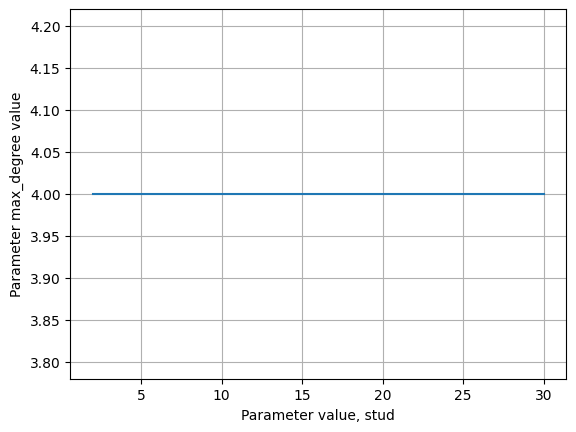

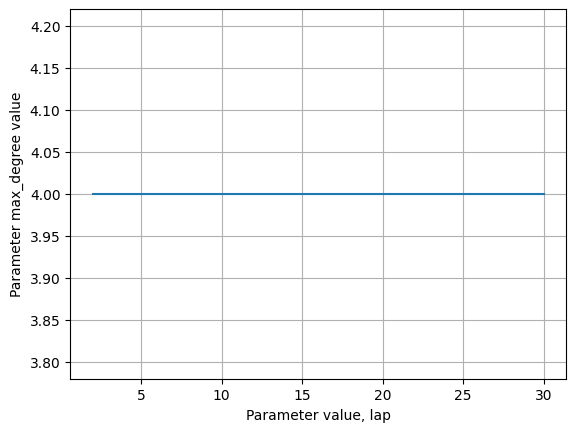

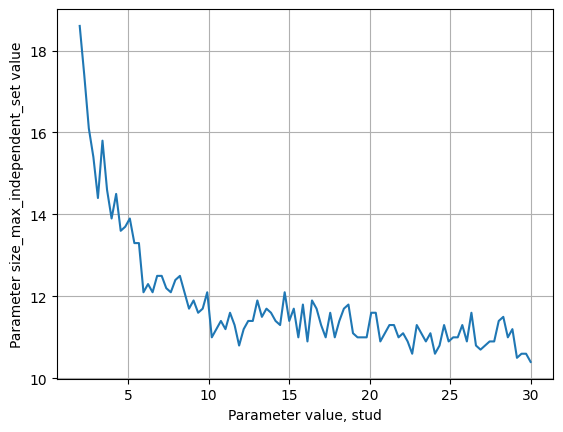

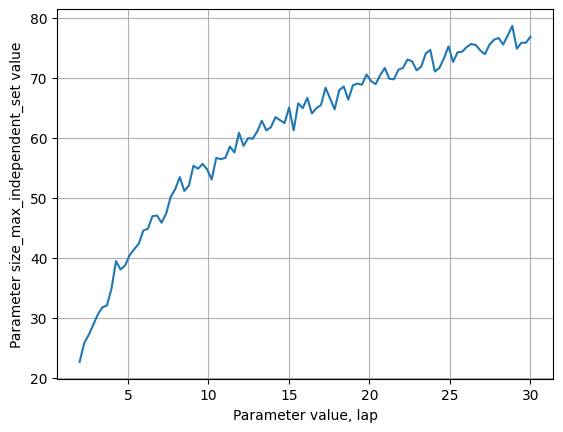

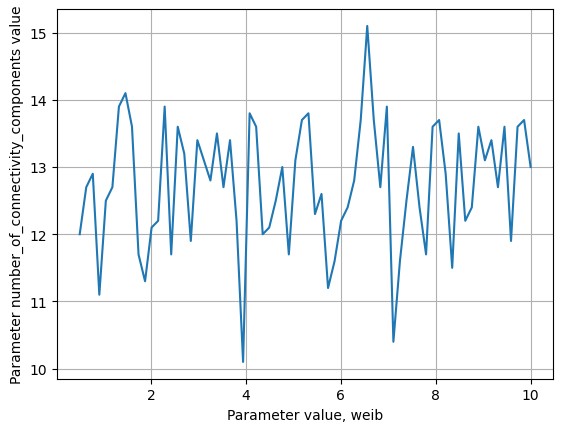

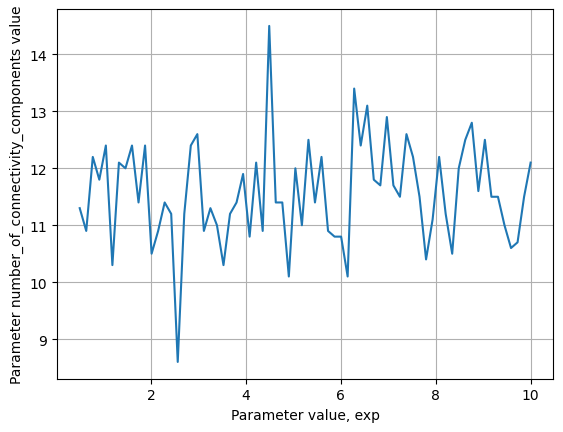

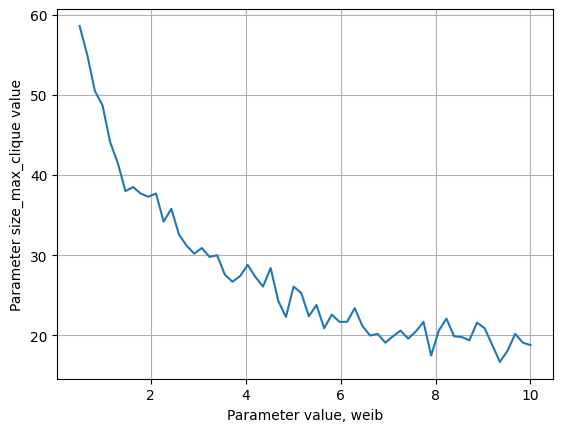

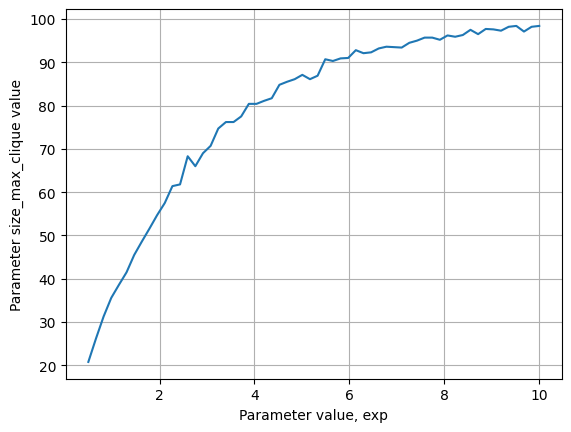

In [ ]:
    print("Анализ четырех функций по их параметрам")
    param_range = np.linspace(2, 30, 100)
    analyze_of_params(param_range, n, input_k, "max_degree", "stud")
    analyze_of_params(param_range, n, input_k, "max_degree", "lap")

    param_range = np.linspace(2, 30, 100)
    analyze_of_params(param_range, n, input_d, "size_max_independent_set", "stud")
    analyze_of_params(param_range, n, input_d, "size_max_independent_set", "lap")

    param_range = np.linspace(0.5, 10, 70)
    analyze_of_params(
        param_range, n, input_k, "number_of_connectivity_components", "weib"
    )
    analyze_of_params(
        param_range, n, input_k, "number_of_connectivity_components", "exp"
    )

    param_range = np.linspace(0.5, 10, 60)
    analyze_of_params(param_range, n, input_d, "size_max_clique", "weib")
    analyze_of_params(param_range, n, input_d, "size_max_clique", "exp")

Часть 1 пункт 2:

Анализ четырех функций по k, d и n
1) max_degree


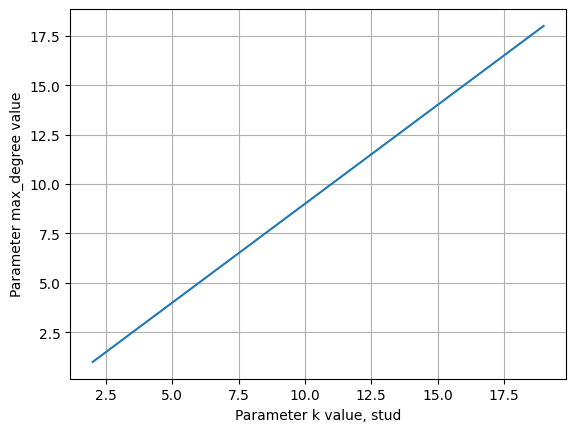

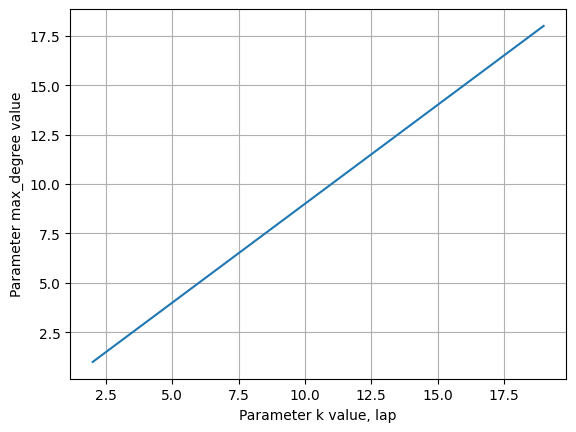

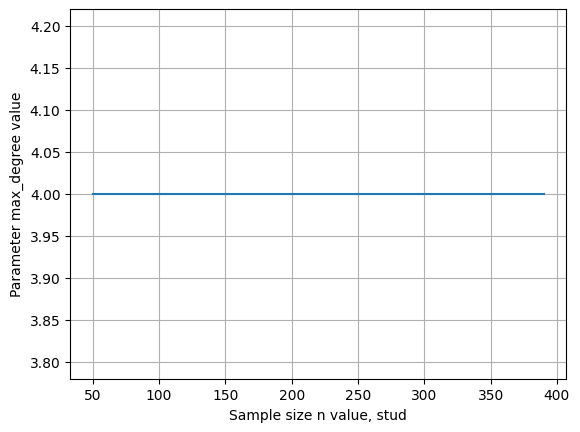

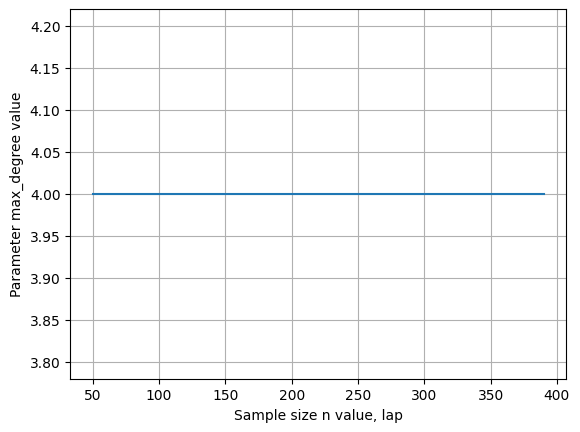

2) size_max_independent_set


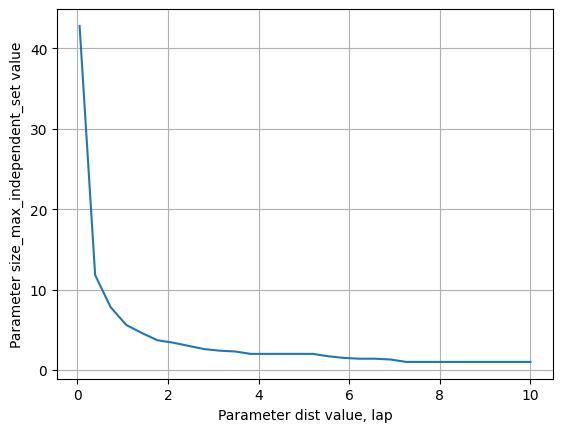

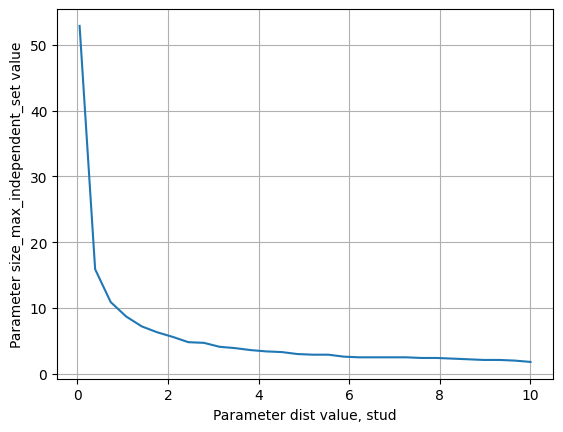

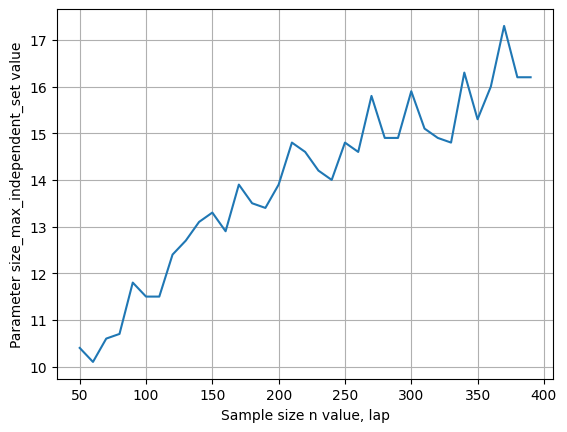

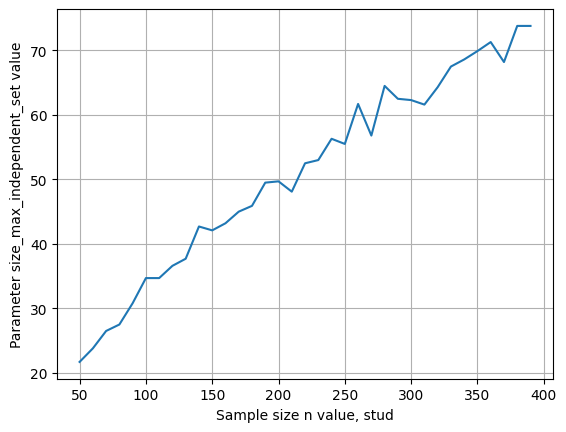

3) number_of_connectivity_components


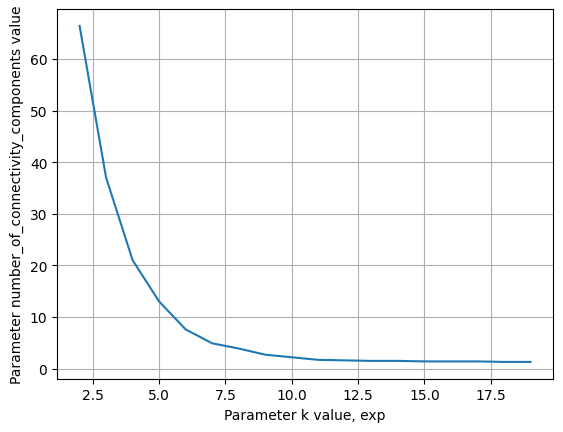

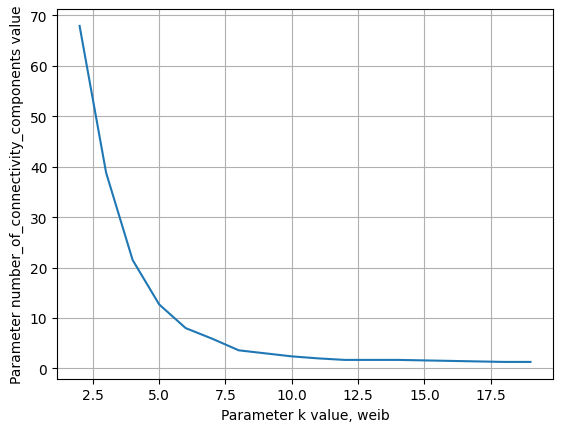

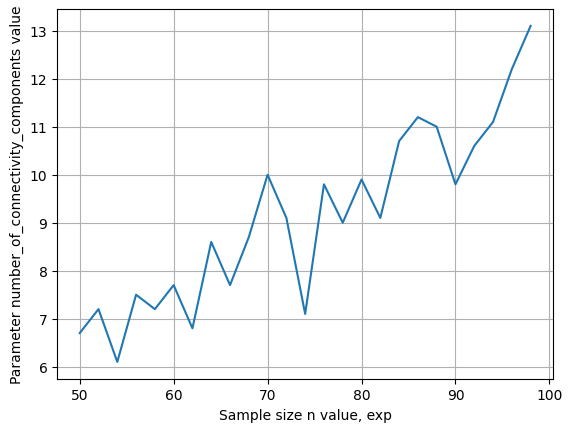

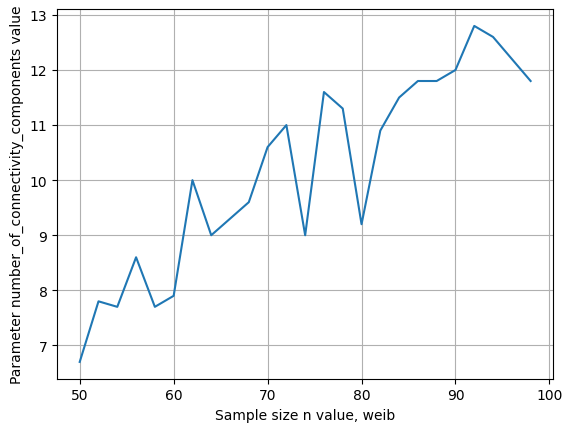

4) size_max_clique


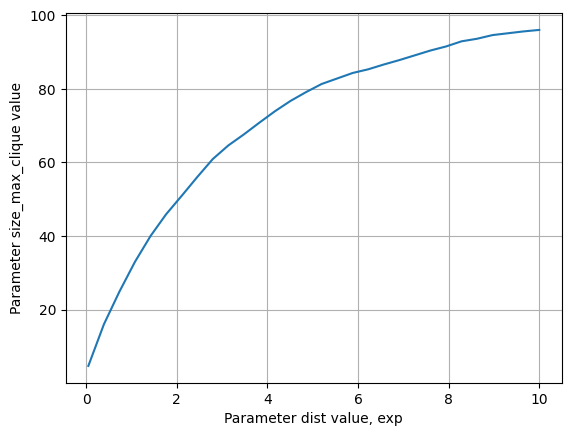

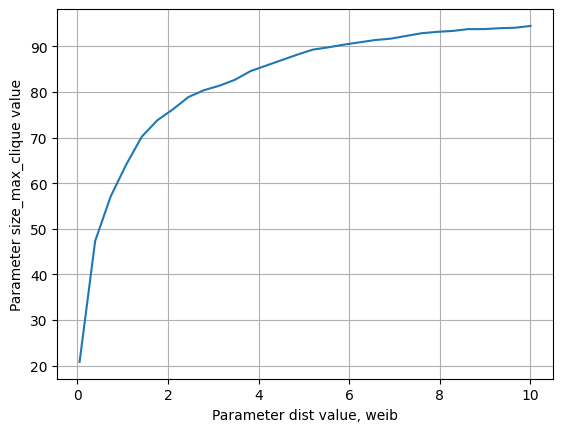

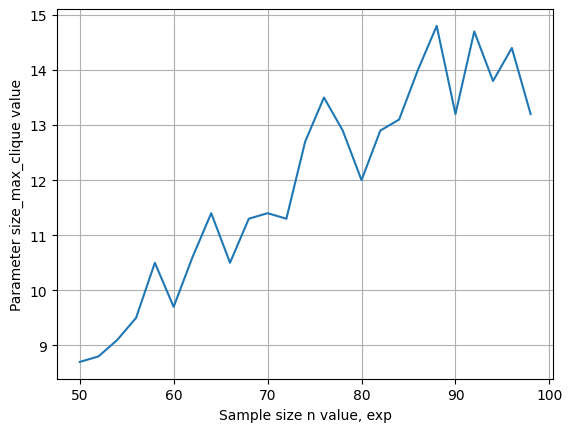

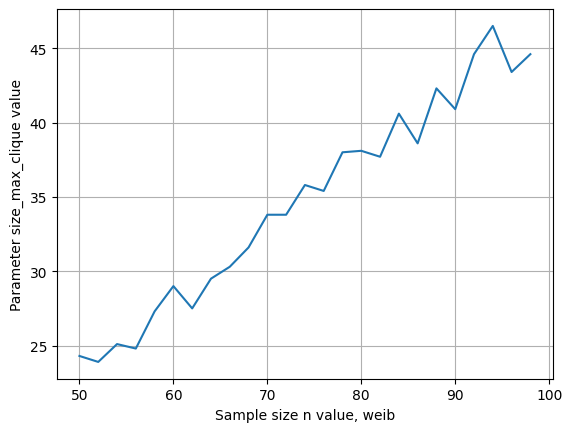

In [ ]:
    print("Анализ четырех функций по k, d и n")
    print("1) max_degree")
    n_range = range(50, 400, 10)
    k_range = range(2, 20)
    analyze_for_k_and_d(par_1, n, k_range, "stud", "max_degree")
    analyze_for_k_and_d(par_2, n, k_range, "lap", "max_degree")
    Analyze_of_n(par_1, "stud", n_range, input_k, "max_degree")
    Analyze_of_n(par_2, "lap", n_range, input_k, "max_degree")

    print("2) size_max_independent_set")
    d_range = np.linspace(0.05, 10, 30)
    analyze_for_k_and_d(par_2, n, d_range, "lap", "size_max_independent_set")
    analyze_for_k_and_d(par_1, n, d_range, "stud", "size_max_independent_set")
    Analyze_of_n(par_2, "lap", n_range, input_d, "size_max_independent_set")
    Analyze_of_n(par_2, "stud", n_range, input_d, "size_max_independent_set")

    print("3) number_of_connectivity_components")
    n_range = range(50, 100, 2)
    k_range = range(2, 20)
    analyze_for_k_and_d(par_3, n, k_range, "exp", "number_of_connectivity_components")
    analyze_for_k_and_d(par_4, n, k_range, "weib", "number_of_connectivity_components")
    Analyze_of_n(par_3, "exp", n_range, input_k, "number_of_connectivity_components")
    Analyze_of_n(par_4, "weib", n_range, input_k, "number_of_connectivity_components")

    print("4) size_max_clique")
    d_range = np.linspace(0.05, 10, 30)
    analyze_for_k_and_d(par_3, n, d_range, "exp", "size_max_clique")
    analyze_for_k_and_d(par_4, n, d_range, "weib", "size_max_clique")
    Analyze_of_n(par_3, "exp", n_range, input_d, "size_max_clique")
    Analyze_of_n(par_4, "weib", n_range, input_d, "size_max_clique")

Часть 1 пункт 3:

In [ ]:
    print("Построение множества А1 и А2")

    n = 300
    k = 5
    d = 0.2
    iterations = 1000

    A1_knn = find_A_1(n, "knn", k, iterations)
    A1_dist = find_A_1(n, "dist", d, iterations)
    A2_knn = find_A_2(n, "knn", k, iterations)
    A2_dist = find_A_2(n, "dist", d, iterations)

Построение множества А1 и А2
power A1 =  1.0
error A1 =  1.0
power A1 =  0.15200000000000002
error A1 =  1.0
power A2 =  0.9939999999999999
error A2 =  0.9999999999999999
power A2 =  0.5660000000000001
error A2 =  1.0


Часть 2 пункт 1:



Исследование важности характеристик


1)Важность признаков у stud и lap
max_degree: 0.5777
size_max_independent_set: 0.4223


2)Важность признаков у exp и weib
number_of_connectivity_components: 0.3782
size_max_clique: 0.6218


Анализ важности признаков в зависимости от размера выборки:


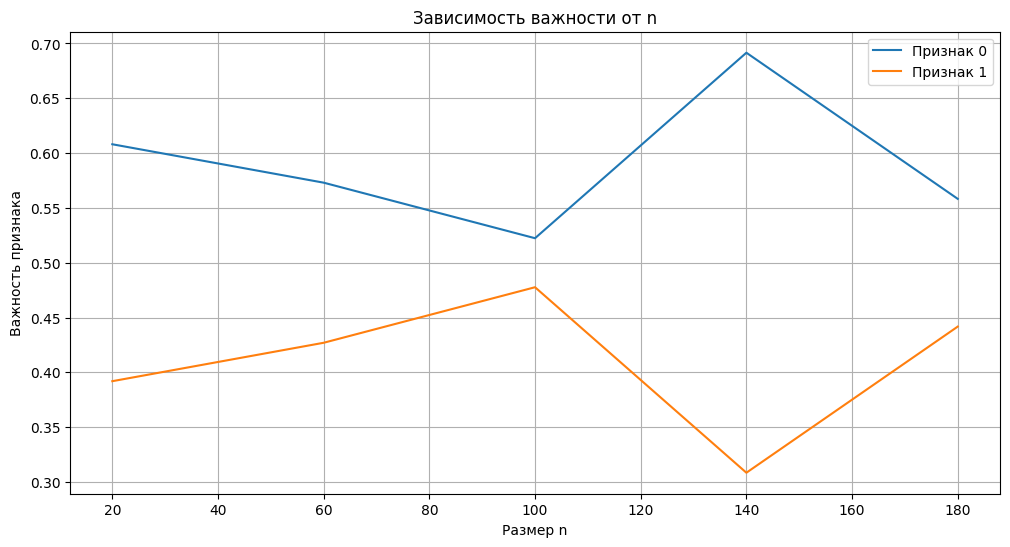

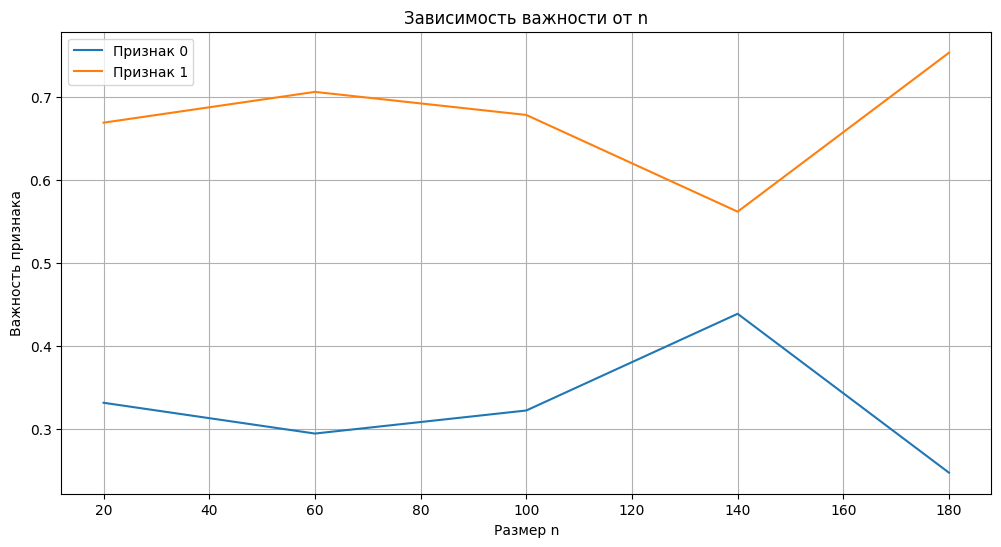

In [ ]:
    print("\n")
    print("Исследование важности характеристик")
    print("\n")
    print("1)Важность признаков у stud и lap")
    clf_knn, df_knn = build_classifier(n, input_d, "stud", "lap", "har_analyse")
    print("\n")
    print("2)Важность признаков у exp и weib")
    clf_dist, df_dist = build_classifier(n, input_d, "weib", "exp", "har_analyse")
    print("\n")
    print("Анализ важности признаков в зависимости от размера выборки:")
    n_range = range(20, 201, 40)
    analyze_feature_importance_vs_n(n_range, input_d, "stud", "lap")
    analyze_feature_importance_vs_n(n_range, input_d, "weib", "exp")

Часть 2 пункт 2:

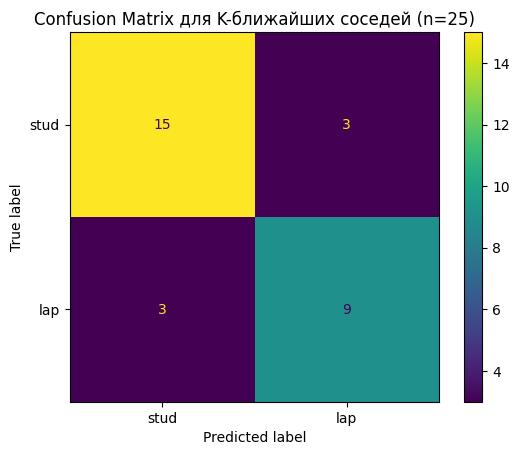

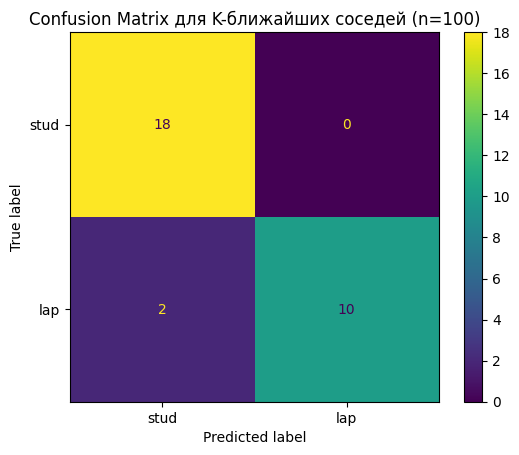

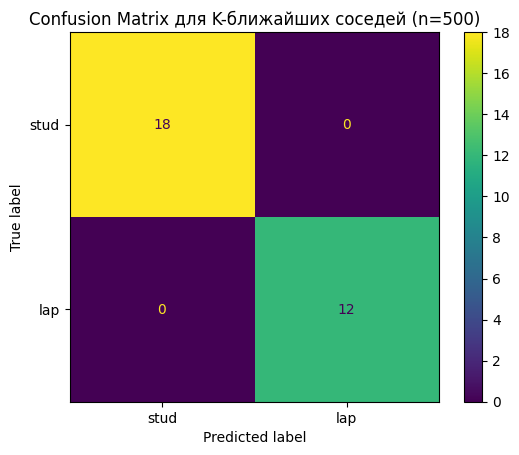


Результаты анализа метрик для различных n:

Размер выборки n = 25
         Классификатор  Точность  Precision    Recall  F1-score
0               Дерево  0.766667   0.692308  0.750000      0.72
1       Лог. регрессия  0.833333   0.769231  0.833333      0.80
2  K-ближайших соседей  0.800000   0.750000  0.750000      0.75

Размер выборки n = 100
         Классификатор  Точность  Precision    Recall  F1-score
0               Дерево  0.933333        1.0  0.833333  0.909091
1       Лог. регрессия  0.933333        1.0  0.833333  0.909091
2  K-ближайших соседей  0.933333        1.0  0.833333  0.909091

Размер выборки n = 500
         Классификатор  Точность  Precision  Recall  F1-score
0               Дерево       1.0        1.0     1.0       1.0
1       Лог. регрессия       1.0        1.0     1.0       1.0
2  K-ближайших соседей       1.0        1.0     1.0       1.0


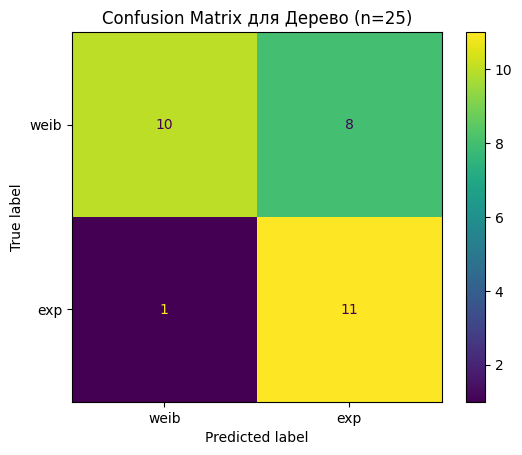

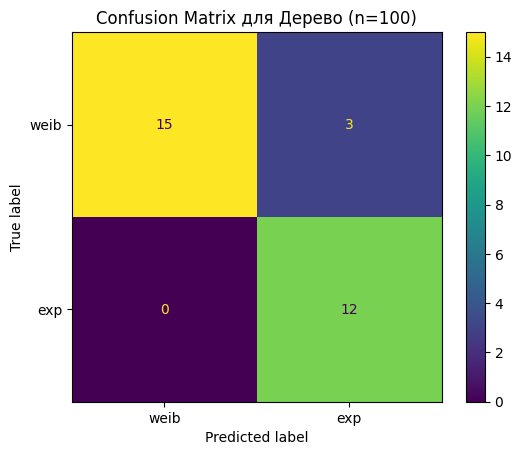

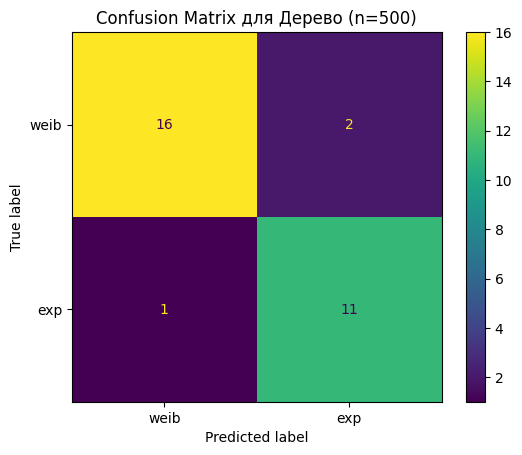


Результаты анализа метрик для различных n:

Размер выборки n = 25
         Классификатор  Точность  Precision    Recall  F1-score
0               Дерево       0.7   0.578947  0.916667  0.709677
1       Лог. регрессия       0.6   0.500000  0.750000  0.600000
2  K-ближайших соседей       0.6   0.500000  1.000000  0.666667

Размер выборки n = 100
         Классификатор  Точность  Precision  Recall  F1-score
0               Дерево  0.900000   0.800000     1.0  0.888889
1       Лог. регрессия  0.933333   0.857143     1.0  0.923077
2  K-ближайших соседей  0.900000   0.800000     1.0  0.888889

Размер выборки n = 500
         Классификатор  Точность  Precision    Recall  F1-score
0               Дерево  0.900000   0.846154  0.916667  0.880000
1       Лог. регрессия  0.933333   0.916667  0.916667  0.916667
2  K-ближайших соседей  0.933333   0.916667  0.916667  0.916667


In [ ]:
    n_range = [25, 100, 500]
    classifier = Analyze_of_metric(
        n_range, input_d, "stud", "lap", "K-ближайших соседей"
    )
    classifier_2 = Analyze_of_metric(n_range, input_d, "weib", "exp", "Дерево")

Часть 2 пункт 3:

In [ ]:
    wrapped_classifier = create_classifier_wrapper(classifier)
    t_classifier_1(wrapped_classifier, input_d)
    wrapped_classifier_2 = create_classifier_wrapper(classifier_2)
    t_classifier_2(wrapped_classifier_2, input_d)

Ошибка первого рода:  0.5
Мощность:  0.0
Точность:  0.0
Ошибка первого рода:  0.0
Мощность:  0.4
Точность:  0.9


[0.0, 0.4, 0.9]